# Background Info

ID: Represents a unique identification of an entry

Customer_ID: Represents a unique identification of a person

Name: Represents the name of a person

Month: Represents the month of the year

Age: Represents the age of the person

SSN: Represents the social security number of a person

Occupation: Represents the occupation of the person

Annual_Income: Represents the annual income of the person

Monthly_Base_Salary: Represents the monthly base salary of a person

Num_Bank_Accounts: Represents the number of bank accounts a person holds

Num_Credit_Card: Represents the number of other credit cards held by a person

Interest_Rate: Represents the interest rate on credit card

Num_of_Loan: Represents the number of loans taken from the bank

Type_of_Loan: Represents the types of loan taken by a person

Delay_from_due_date: Represents the average number of days delayed from the payment date

Num_of_delayed_Payment: Represents the average number of payments delayed by a person

Changed_Credit_Limit: Represents the percentage change in credit card limit

Num_Credit_Inquiries: Represents the number of credit card inquiries

Credit_Mix: Represents the classification of the mix of credits

Outstanding_Debt: Represents the remaining debt to be paid (in USD)

Credit_Utilization_Ratio: Represents the utilization ratio of credit card

Credit_History_Age: Represents the age of credit history of the person

Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person

Total_EMI_per_month: Represents the monthly EMI payments (in USD)

Amount_invested_monthly: Represents the monthly amount invested by the customer (in USD)

Payment_Behaviour: Represents the payment behavior of the customer (in USD)

Monthly_Balance: Represents the monthly balance amount of the customer (in USD)

Credit_Score: Represents the bracket of credit score (Poor, Standard, Good)

# Packages and read in data

In [ ]:
# pip install missingno

In [150]:
##import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from scipy import stats
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder


In [105]:
#Due to some columns contain more than one data type, there is a warning message, just ignore it
df = pd.read_csv(r'C:\Users\11139\Desktop\GR5241-ml\train.csv')

C:\Users\11139\anaconda3\envs\tf2\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [106]:
pd.set_option('display.max_columns', None)
df.iloc[:10,:]
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,1,7.42,2.0,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [107]:
display(df.describe(exclude=np.number).T)
#to see non-numeric columns remain in the dataframe
df.describe()

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [108]:
df['ID'].count(), df['Name'].count(), df['Name'].isna().sum()
# The difference between count and unique is num of NA in the column
# We also find that there are outliers. Next step, we will first drop NA and remove outliers.

(100000, 90015, 9985)

In [109]:
df1=df.copy()

In [110]:
#first we deal with strange value in categorical columns
categorical_cols = [c for c in df.columns if df[c].dtype == 'object']
for i in categorical_cols:
    print(f'Unique Values of {i} is {df[i].unique()}')

Unique Values of ID is ['0x1602' '0x1603' '0x1604' ... '0x25feb' '0x25fec' '0x25fed']
Unique Values of Customer_ID is ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']
Unique Values of Month is ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']
Unique Values of Name is ['Aaron Maashoh' nan 'Rick Rothackerj' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']
Unique Values of Age is ['23' '-500' '28_' ... '4808_' '2263' '1342']
Unique Values of SSN is ['821-00-0265' '#F%$D@*&8' '004-07-5839' ... '133-16-7738' '031-35-0942'
 '078-73-5990']
Unique Values of Occupation is ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
Unique Values of Annual_Income is ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']
Unique Values of Num_of_Loan is ['4' '1' '3' '967' '-100' '0' '0_' '2' '3_' '2_' '7

In [111]:
#there are many numeric value followed by '_', let's remove it
for i in categorical_cols:
    df1[i] = df1[i].str.strip('_')
    df1[i] = df1[i].replace('',np.nan)
    df1[i] = df1[i].replace('!@9#%8',np.nan) 
    df1[i] = df1[i].replace('#F%$D@*&8',np.nan)
    try:
        df1[i] = df1[i].astype('float')
    except:
        df1[i] = df1[i].astype('str')

In [112]:
display(df1.describe(exclude=np.number).T)
#to recheck non-numeric columns remain in the dataframe
#strange value is cleaned and seems successful
#as reminder, Credit_History_Age can change into float by re

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,100000,10140,nan,9985
SSN,100000,12501,nan,5572
Occupation,100000,16,nan,7062
Type_of_Loan,100000,6261,nan,11408
Credit_Mix,100000,4,Standard,36479
Credit_History_Age,100000,405,nan,9030
Payment_of_Min_Amount,100000,3,Yes,52326


In [113]:
#Recall from describe, after we deal with strange values in categorical columns, outliers in numerical columns are next target
#to prevent data loss, we want outliers to be replaced by same value from same users
dict1 = pd.Series(df1['Num_Bank_Accounts'].values,index=df1['ID']).to_dict()
#However, dictionary is not the possible solution. There are 1315 users who own bank accounts over 11
df['Num_Bank_Accounts'].quantile(.95) # =10

a  = 0
for i in dict1.values():
    if i>11:
        a = a+1
a

1315

(445.00999999999476, 10.0)

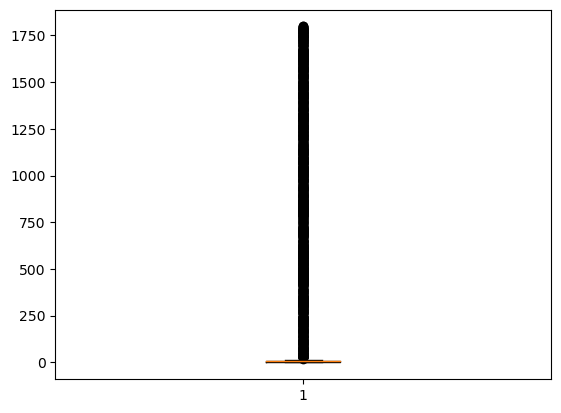

In [114]:
plt.boxplot(df1['Num_Bank_Accounts'])
df1['Num_Bank_Accounts'].quantile(.99), df1['Num_Bank_Accounts'].quantile(.95)

In [115]:
#We replace outlier to nas
numerical_cols = [col for col in df1.columns if (df1[col].dtype == 'int64') | (df1[col].dtype == 'float64')]

for x in list(numerical_cols):
    q_low = df1[x].quantile(0.05)
    q_hi  = df1[x].quantile(0.95)

    df1.loc[df1[x] < q_low,x] = np.nan
    df1.loc[df1[x] > q_hi,x] = np.nan

<AxesSubplot:>

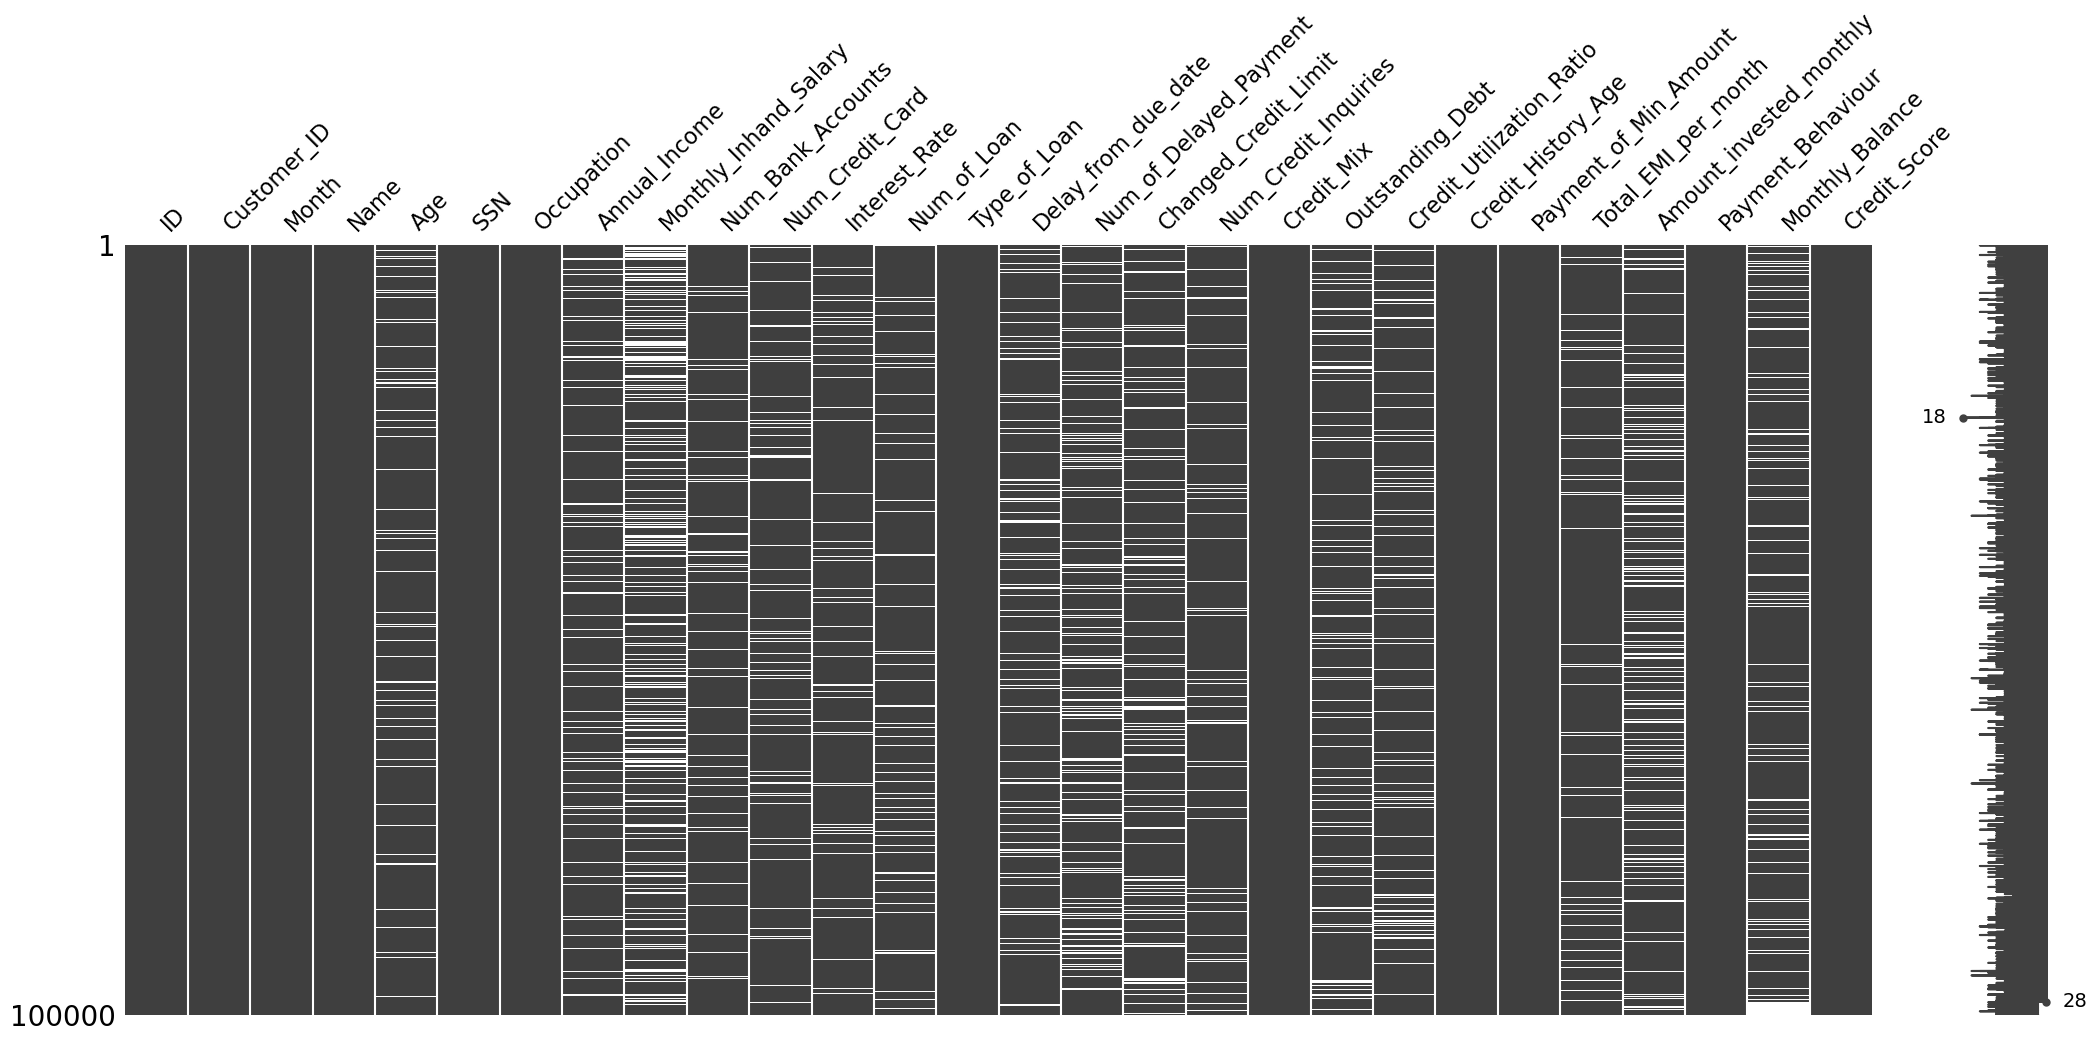

In [116]:
#NA can see in graph as white line
msno.matrix(df1)

In [117]:
## type of loan? dropb

In [118]:
#as a short intermediate summary for data cleaning, let's see number of nas in each columns 
miss =df1.isnull().sum()
miss =miss[miss>0]
miss
#you can see, if we just drop all outlier rows, we will loose a lot of informations
#thus, we choose to replace value instead of drop it
#instead of drop the row, replace the outlier from upper row or median are better choices

Age                          8569
Annual_Income                9991
Monthly_Inhand_Salary       23500
Num_Bank_Accounts            5673
Num_Credit_Card              6601
Interest_Rate                6219
Num_of_Loan                  8050
Delay_from_due_date          9016
Num_of_Delayed_Payment      13995
Changed_Credit_Limit        11813
Num_Credit_Inquiries         6202
Outstanding_Debt            10000
Credit_Utilization_Ratio    10000
Total_EMI_per_month          4998
Amount_invested_monthly     14031
Monthly_Balance             12582
dtype: int64

In [119]:
#we can replace nan based on same consumter ID
#display the first 10 rows, we can find
#ID is representation of unique row, but cannot be representation of unique costumer, we drop it
df1.drop(columns=['ID','Name','SSN'], axis=1, inplace=True)
df1.head(10)
#Among first eight records, they come from same person.
#Nans in Monthly_Inhand_Salary of first person can be replaced

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,nan,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,CUS_0xd40,February,23.0,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,NaN,11.27,4.0,Good,809.98,31.944960,nan,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,CUS_0xd40,March,NaN,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,CUS_0xd40,April,23.0,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,CUS_0xd40,May,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,CUS_0xd40,June,23.0,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8.0,4.0,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,nan,340.479212,Good
6,CUS_0xd40,July,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,8.0,11.27,4.0,Good,809.98,NaN,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,CUS_0xd40,August,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,6.0,11.27,4.0,Good,809.98,NaN,nan,No,49.574949,NaN,High_spent_Medium_value_payments,358.124168,Standard
8,CUS_0x21b1,January,28.0,nan,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,4.0,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
9,CUS_0x21b1,February,28.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,7.0,NaN,7.42,2.0,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good


In [120]:
#we cand fill in based on same Customer_ID, it's also unique, means this person always have same Monthly_Inhand_Salary
numerical_df1 = {col for col in df1.columns if (df1[col].dtype=='int64') | (df1[col].dtype=='float64')}
categorical_df1 = {col for col in df1.columns if (df1[col].dtype=='object')}
                      
unique_based = [col for col in numerical_df1 if df1[col].head(8).nunique() == 1] #fill by back
df1[unique_based] = df1[unique_based].fillna(method='bfill')

non_unique_based = [col for col in numerical_df1 if df1[col].head(8).nunique() != 1] #fill by median
df1[non_unique_based] = df1.groupby(by=['Customer_ID'])[non_unique_based].transform('median')

In [121]:
#do same fill by back for categorical columns
#notice this time "Credit_History_Age" is skipped
missing_cols = {col for col in missing.index}
categorical_miss=[col for col in categorical_df1.intersection(missing_cols)]
categorical_miss=[ 'Payment_Behaviour','Credit_Mix','Occupation','Type_of_Loan']
df1 = df1[categorical_miss].fillna(method='bfill')
df1 = df1[categorical_miss].fillna(method='ffill')

In [122]:
df_2 = df_1

<AxesSubplot:>

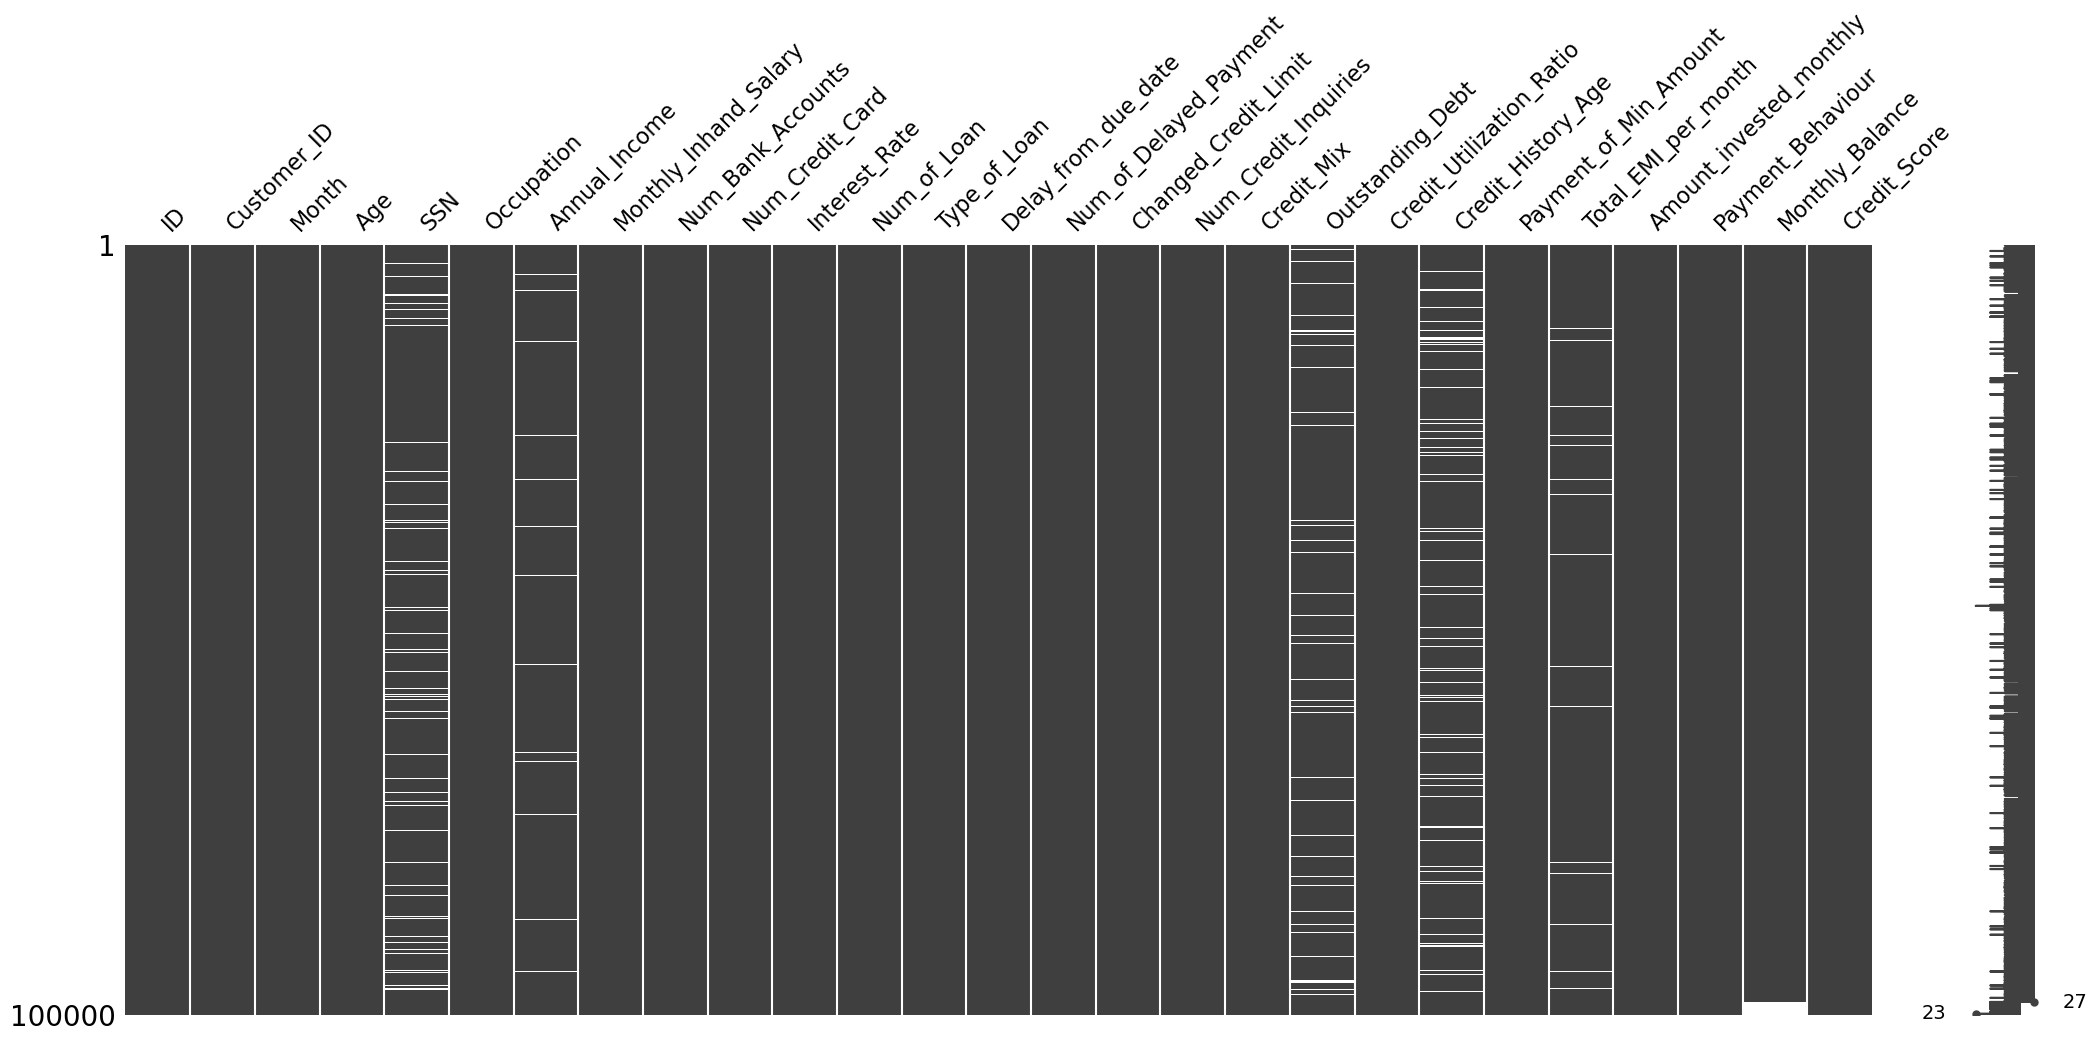

In [123]:
msno.matrix(df_2)

In [124]:
##drop nan,(the Credit_HIstory _Age, Total_EMI_per_month, outstanding debt)
df_c=df_2.dropna()

In [158]:
#replace with order numbers
df_clean=df_c.copy()
df_clean['Credit_Score'] = df_clean['Credit_Score'].map({'Poor':1, 'Standard':2, 'Good':3})

In [157]:
df_clean['Payment_of_Min_Amount'] = df_clean['Payment_of_Min_Amount'].replace({'No':0,'Yes':1,'NM':0}, inplace=True)
df_clean = df_clean['Credit_Mix'].replace({'Bad':0,'Standard':1,'Good':2}, inplace=True)

In [139]:
df_clean.head(10)

,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,1,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,22.08,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,3
2,CUS_0xd40,3,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,6.27,4.0,Good,809.98,28.609352,22.25,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,3
3,CUS_0xd40,4,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,22.33,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,3
4,CUS_0xd40,5,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,22.42,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,3
5,CUS_0xd40,6,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8.0,4.0,9.27,4.0,Good,809.98,27.262259,22.50,No,49.574949,62.430172,Low_spent_Small_value_payments,340.479212,3
6,CUS_0xd40,7,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,8.0,11.27,4.0,Good,809.98,22.537593,22.58,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,3
8,CUS_0x21b1,1,28.0,004-07-5839,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,4.0,5.42,2.0,Good,605.03,24.464031,26.58,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,2
9,CUS_0x21b1,2,28.0,004-07-5839,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,7.0,1.0,7.42,2.0,Good,605.03,38.550848,26.67,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,3
10,CUS_0x21b1,3,28.0,004-07-5839,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,-1.0,5.42,2.0,Good,605.03,33.224951,26.75,No,18.816215,58.515976,High_spent_Large_value_payments,466.466476,2
11,CUS_0x21b1,4,28.0,004-07-5839,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,3.0,5.42,2.0,Good,605.03,39.182656,26.83,No,18.816215,99.306228,Low_spent_Medium_value_payments,465.676224,3


In [127]:
#Transfrom Month to float
df_clean['Month'] = df_clean['Month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 
                                           'June':6, 'July':7, 'August':8, 'September':9, 'October':10,
                                            'November':11, 'December':12})

In [128]:
#Transform the Credit_History_Age to float in unit of years
df_clean['Credit_History_Age'] = df_clean['Credit_History_Age'].astype(str).str.replace(' Years and ','.')
df_clean['Credit_History_Age'] = df_clean['Credit_History_Age'].astype(str).str.replace('Months','')
df_clean.head()

def ym(x):
    Y=float(x.split('.')[0])
    M=float(x.split('.')[1])
    return round(Y+M/12, 2)
df_clean.Credit_History_Age=df_clean.Credit_History_Age.apply(lambda x :ym(x))

,ID,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,22.1,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,3
2,0x1604,CUS_0xd40,3,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,6.27,4.0,Good,809.98,28.609352,22.3,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,3
3,0x1605,CUS_0xd40,4,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,22.4,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,3
4,0x1606,CUS_0xd40,5,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,22.5,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,3
5,0x1607,CUS_0xd40,6,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8.0,4.0,9.27,4.0,Good,809.98,27.262259,22.6,No,49.574949,62.430172,Low_spent_Small_value_payments,340.479212,3


In [140]:
df_clean.head(10)

,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,1,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,22.08,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,3
2,CUS_0xd40,3,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,6.27,4.0,Good,809.98,28.609352,22.25,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,3
3,CUS_0xd40,4,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,22.33,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,3
4,CUS_0xd40,5,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,22.42,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,3
5,CUS_0xd40,6,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8.0,4.0,9.27,4.0,Good,809.98,27.262259,22.50,No,49.574949,62.430172,Low_spent_Small_value_payments,340.479212,3
6,CUS_0xd40,7,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,8.0,11.27,4.0,Good,809.98,22.537593,22.58,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,3
8,CUS_0x21b1,1,28.0,004-07-5839,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,4.0,5.42,2.0,Good,605.03,24.464031,26.58,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,2
9,CUS_0x21b1,2,28.0,004-07-5839,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,7.0,1.0,7.42,2.0,Good,605.03,38.550848,26.67,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,3
10,CUS_0x21b1,3,28.0,004-07-5839,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,-1.0,5.42,2.0,Good,605.03,33.224951,26.75,No,18.816215,58.515976,High_spent_Large_value_payments,466.466476,2
11,CUS_0x21b1,4,28.0,004-07-5839,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,3.0,5.42,2.0,Good,605.03,39.182656,26.83,No,18.816215,99.306228,Low_spent_Medium_value_payments,465.676224,3


In [133]:
df_clean.reset_index(drop=True)

,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,1,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,22.08,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,3
1,CUS_0xd40,3,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,6.27,4.0,Good,809.98,28.609352,22.25,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,3
2,CUS_0xd40,4,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,22.33,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,3
3,CUS_0xd40,5,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,22.42,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,3
4,CUS_0xd40,6,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8.0,4.0,9.27,4.0,Good,809.98,27.262259,22.50,No,49.574949,62.430172,Low_spent_Small_value_payments,340.479212,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76921,CUS_0x9d41,3,38.0,979-38-2855,Lawyer,41015.55,3152.962500,0.0,4.0,4.0,1.0,Payday Loan,9.0,1.0,1.58,2.0,Good,599.40,30.760830,25.08,No,25.671257,10000.000000,Low_spent_Small_value_payments,178.327142,2
76922,CUS_0x9d41,4,38.0,979-38-2855,Lawyer,41015.55,3152.962500,0.0,4.0,4.0,1.0,Payday Loan,9.0,1.0,1.58,2.0,Good,599.40,31.936092,25.17,NM,25.671257,387.541439,Low_spent_Small_value_payments,192.083554,2
76923,CUS_0x9d41,5,38.0,979-38-2855,Lawyer,41015.55,3152.962500,0.0,4.0,4.0,1.0,Payday Loan,9.0,1.0,1.58,2.0,Good,599.40,26.268474,25.25,No,25.671257,76.057218,High_spent_Large_value_payments,453.567775,2
76924,CUS_0x9d41,7,38.0,979-38-2855,Lawyer,41015.55,3152.962500,0.0,4.0,4.0,1.0,Payday Loan,9.0,3.0,2.58,2.0,Good,599.40,38.514974,25.42,No,25.671257,205.830993,High_spent_Small_value_payments,343.794000,2


In [159]:
#Dummy Encoding Occupation column
df_cleaned = pd.get_dummies(df_clean, prefix='Occupation', columns=['Occupation'], drop_first=False)

In [165]:
#Transform Type_of_Loan
# df_cleaned.info()
df_cleaned['Type_of_Loan'].value_counts()

Not Specified                                                                                   1324
Credit-Builder Loan                                                                             1226
Personal Loan                                                                                   1189
Debt Consolidation Loan                                                                         1177
Home Equity Loan                                                                                1081
                                                                                                ... 
Mortgage Loan, Not Specified, and Payday Loan                                                      3
Auto Loan, Student Loan, Home Equity Loan, and Student Loan                                        3
Not Specified, Student Loan, Not Specified, Mortgage Loan, Home Equity Loan, and Payday Loan       3
Debt Consolidation Loan, Home Equity Loan, Personal Loan, Payday Loan, and Mortgage Loan   

In [142]:
df_cleaned=df_clean.copy()

Cleaning is done 

Checking Data & EDA

In [135]:
###checking occupation& plot
occupation_count = df_cleaned['Occupation'].value_counts()
occupation_count

Lawyer           5412
Engineer         5282
Developer        5233
Scientist        5210
Architect        5210
Media_Manager    5183
Teacher          5178
Mechanic         5176
Entrepreneur     5139
Accountant       5107
Journalist       5091
Doctor           5038
Musician         4931
Manager          4930
Writer           4806
Name: Occupation, dtype: int64

array([[<AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Annual_Income'}>,
        <AxesSubplot:title={'center':'Monthly_Inhand_Salary'}>],
       [<AxesSubplot:title={'center':'Num_Bank_Accounts'}>,
        <AxesSubplot:title={'center':'Num_Credit_Card'}>,
        <AxesSubplot:title={'center':'Interest_Rate'}>,
        <AxesSubplot:title={'center':'Num_of_Loan'}>],
       [<AxesSubplot:title={'center':'Delay_from_due_date'}>,
        <AxesSubplot:title={'center':'Num_of_Delayed_Payment'}>,
        <AxesSubplot:title={'center':'Changed_Credit_Limit'}>,
        <AxesSubplot:title={'center':'Num_Credit_Inquiries'}>],
       [<AxesSubplot:title={'center':'Outstanding_Debt'}>,
        <AxesSubplot:title={'center':'Credit_Utilization_Ratio'}>,
        <AxesSubplot:title={'center':'Credit_History_Age'}>,
        <AxesSubplot:title={'center':'Total_EMI_per_month'}>],
       [<AxesSubplot:title={'center':'Amount_investe

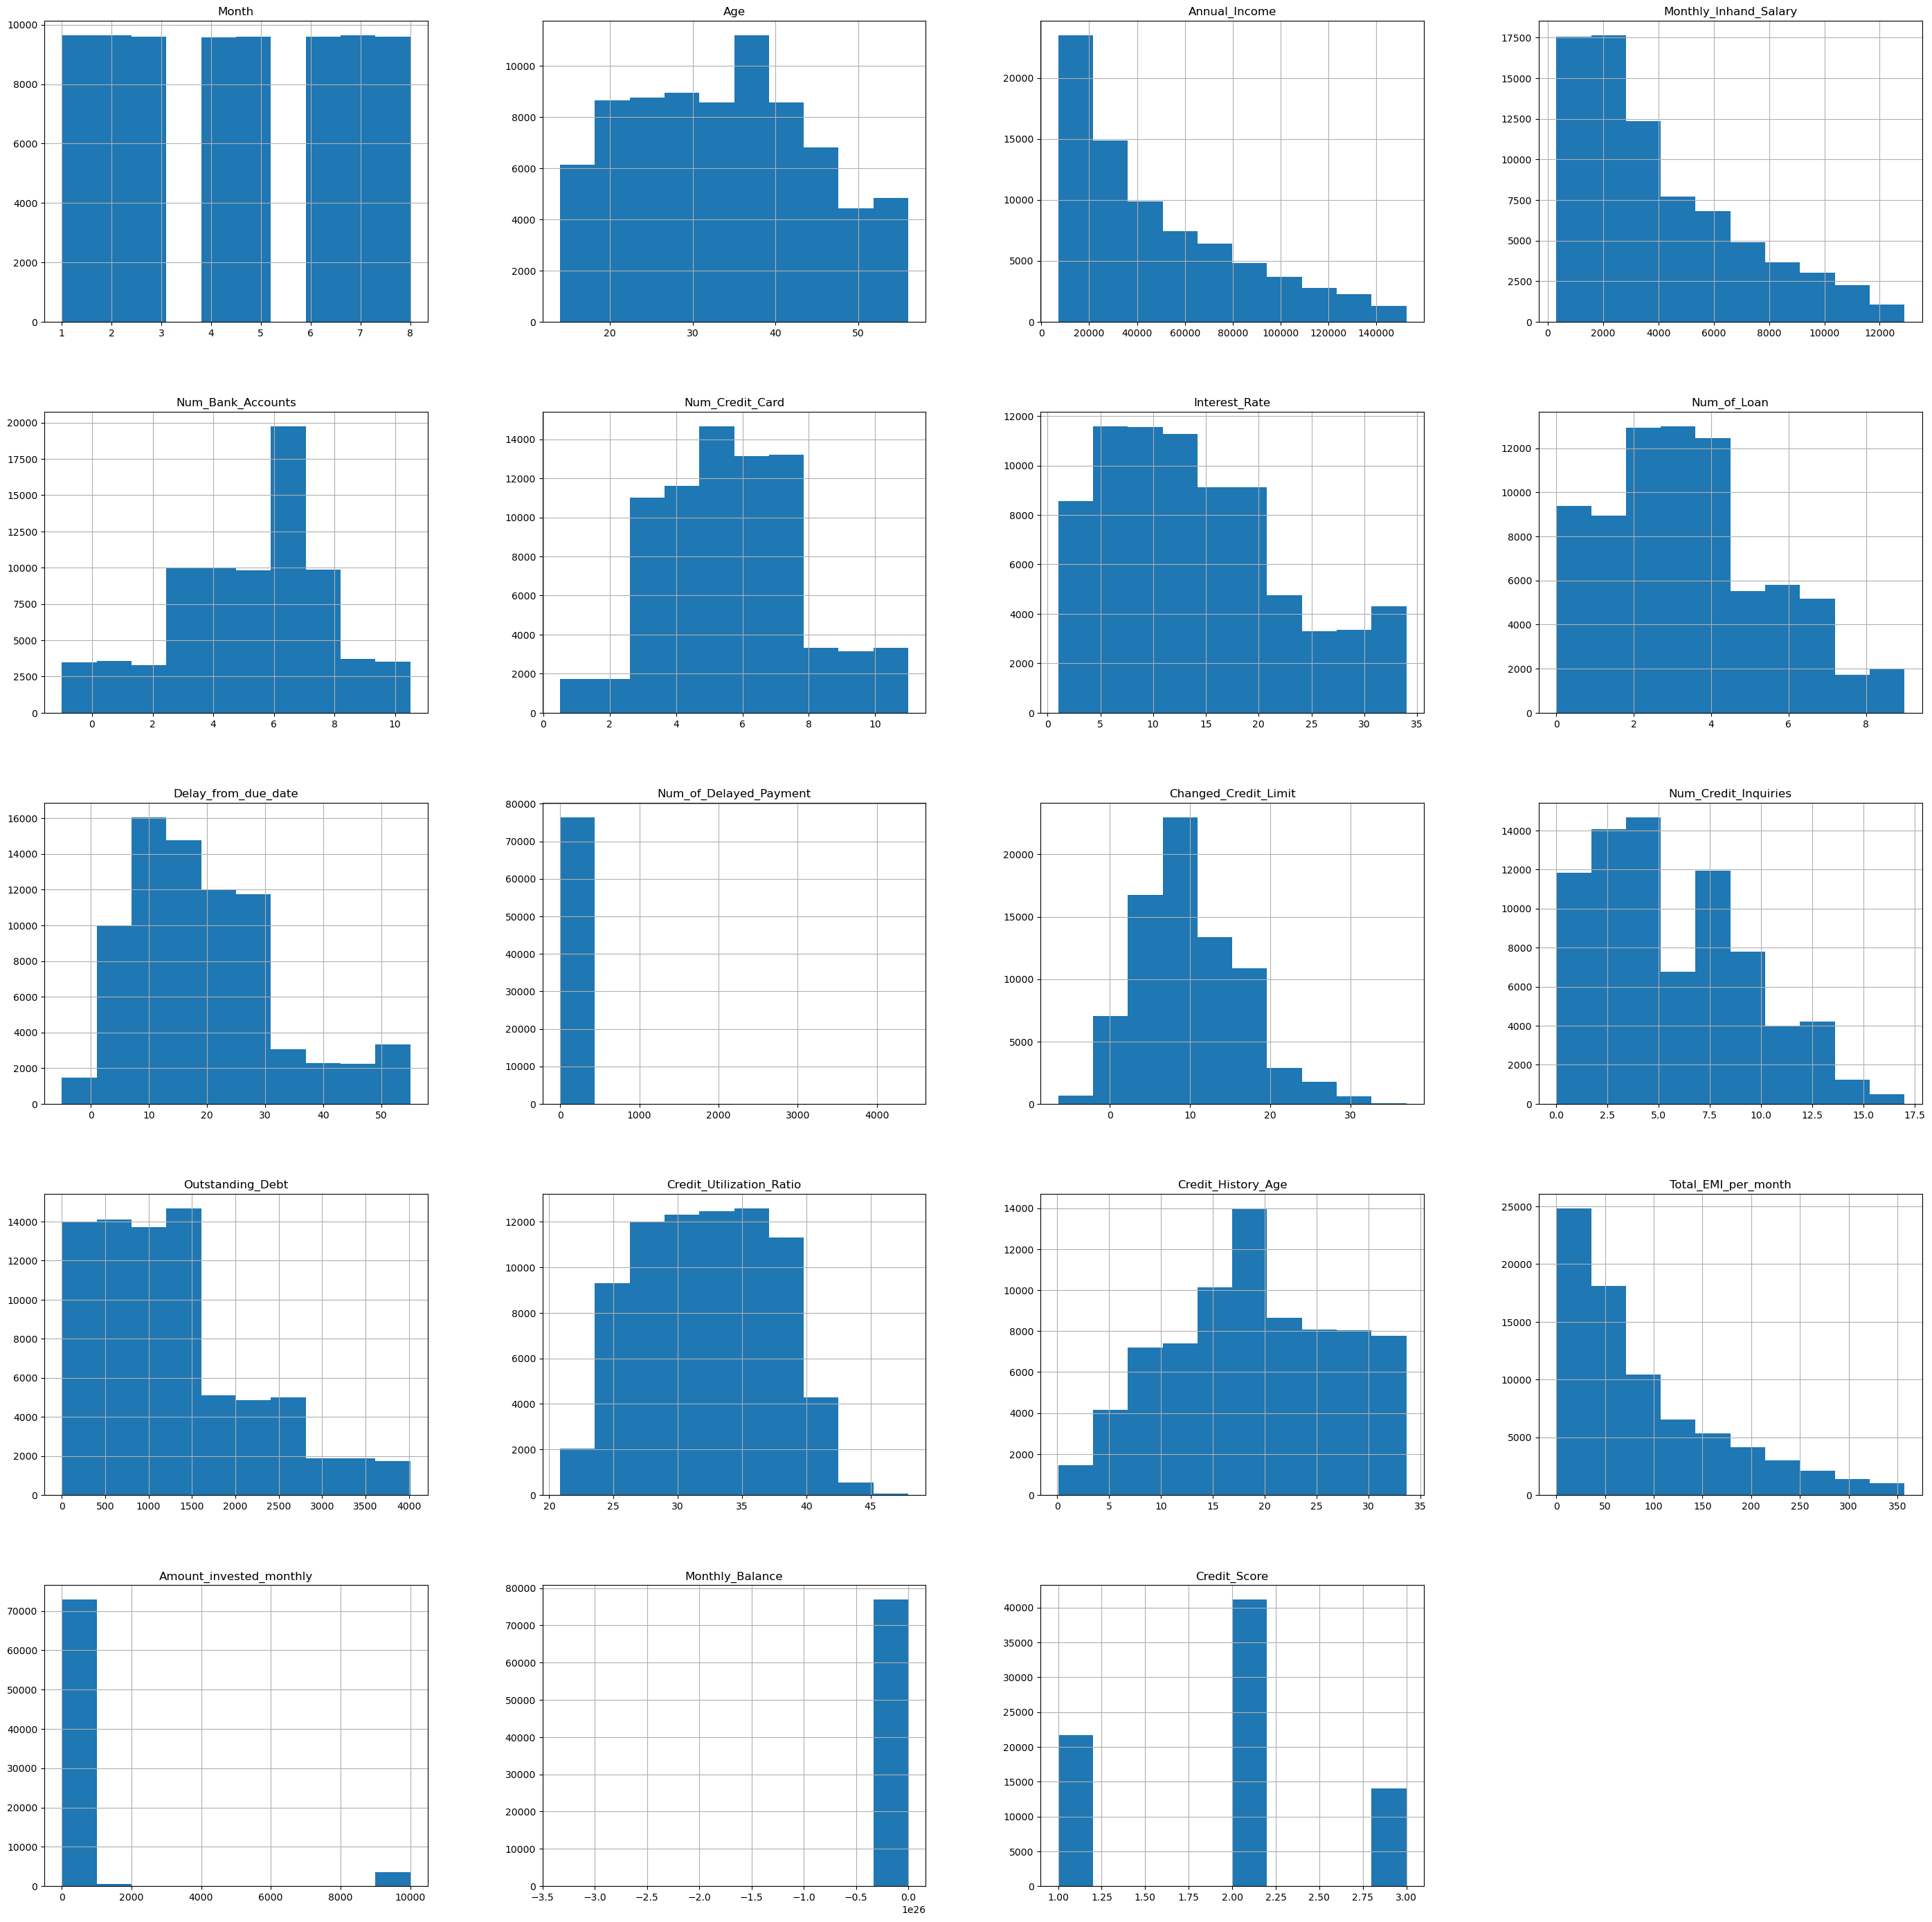

In [136]:
### plot hist
df_cleaned.hist(figsize=(35, 35))

10000.000000    3516
0.000000         122
100.155079         5
68.497036          4
228.070039         3
                ... 
50.402588          1
860.634374         1
443.503928         1
409.179831         1
205.830993         1
Name: Amount_invested_monthly, Length: 70506, dtype: int64

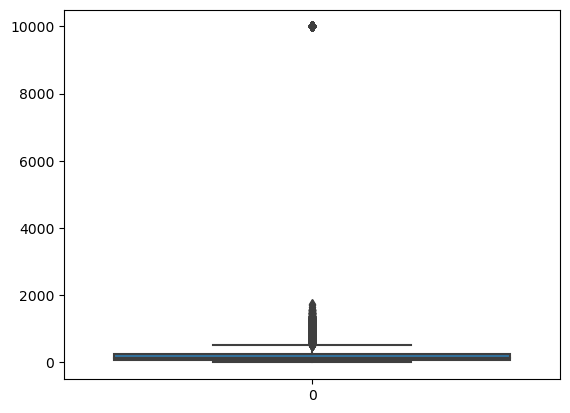

In [137]:
sns.boxplot(df_cleaned['Amount_invested_monthly'])
df_cleaned['Amount_invested_monthly'].value_counts()
#Amount_invested_monthly differ largely

array([[<AxesSubplot:xlabel='Credit_History_Age', ylabel='Credit_History_Age'>,
        <AxesSubplot:xlabel='Num_of_Loan', ylabel='Credit_History_Age'>,
        <AxesSubplot:xlabel='Num_Bank_Accounts', ylabel='Credit_History_Age'>],
       [<AxesSubplot:xlabel='Credit_History_Age', ylabel='Num_of_Loan'>,
        <AxesSubplot:xlabel='Num_of_Loan', ylabel='Num_of_Loan'>,
        <AxesSubplot:xlabel='Num_Bank_Accounts', ylabel='Num_of_Loan'>],
       [<AxesSubplot:xlabel='Credit_History_Age', ylabel='Num_Bank_Accounts'>,
        <AxesSubplot:xlabel='Num_of_Loan', ylabel='Num_Bank_Accounts'>,
        <AxesSubplot:xlabel='Num_Bank_Accounts', ylabel='Num_Bank_Accounts'>]],
      dtype=object)

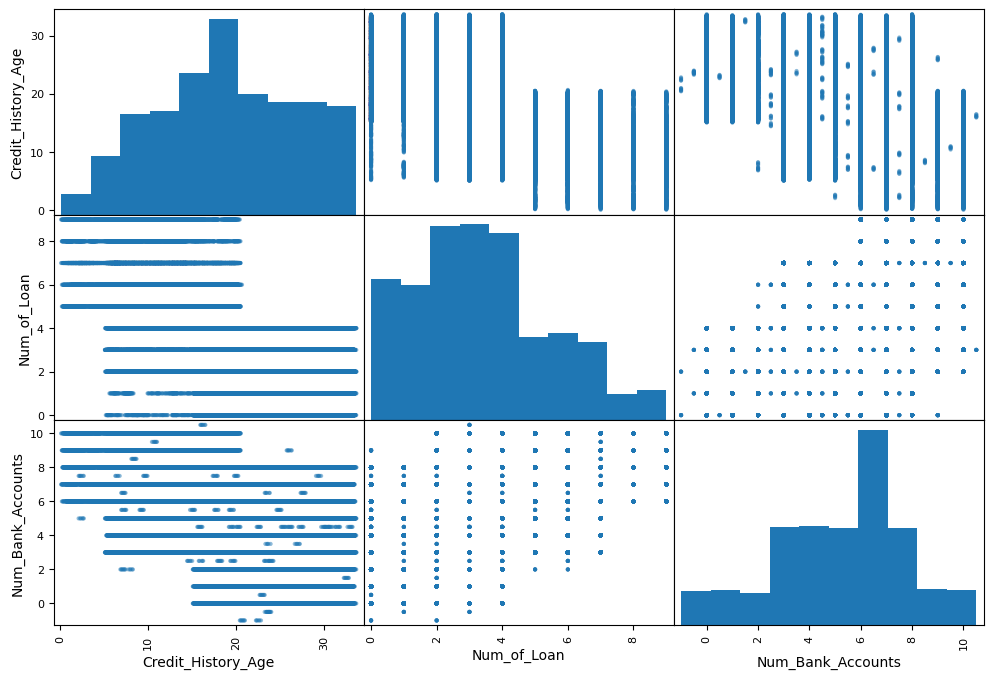

In [138]:
#Let's focus on those to see scatter matrix plot
attributes = ["Credit_History_Age","Num_of_Loan", "Num_Bank_Accounts"]
scatter_matrix(df_cleaned[attributes], figsize=(12, 8))
#"Num_of_Loan", "Num_Bank_Accounts", "Num_Credit_Card", "Delay_from_due_date", "Outstanding_Debt", "Num_Credit_Inquiries", "Interest_Rate"]